In [ ]:
#!pip install textblob
#!pip install openpyxl

In [ ]:
import pandas as pd
import re
import numpy as np
from textblob import TextBlob

In [ ]:
#merge df
# url1 = 'https://raw.githubusercontent.com/Zaniiiii/DataGemas/main/Baru/fifa/before_fifa-tuan.csv'
# url2 = 'https://raw.githubusercontent.com/Zaniiiii/DataGemas/main/Baru/fifa/before_fifa-indonesia.csv'
# url3 = 'https://raw.githubusercontent.com/Zaniiiii/DataGemas/main/Baru/fifa/before_fifa-israel.csv'
# url4 = 'https://raw.githubusercontent.com/Zaniiiii/DataGemas/main/Baru/fifa/before_fifa-pemerintah.csv'
# url5 = 'https://raw.githubusercontent.com/Zaniiiii/DataGemas/main/Baru/fifa/before_fifa-indonesia-israel.csv'

url = 'https://drive.google.com/uc?id='

df1 = pd.read_csv(url + '120EIdKURKggRSSwucHxfJMnohHd92Jnw', sep=';')
df2 = pd.read_csv(url + '1TESmVEZ1A0qSYrusQizfV0koOqTrmSLD', sep=';')
df3 = pd.read_csv(url + '1s3zvkzvOtIxea4f5viwqea04Sw2bQIZJ', sep=';')
df4 = pd.read_csv(url + '1F11zopaCJS7rXYJGNjeKi83bwtZUyiv_', sep=';')
df5 = pd.read_csv(url + '1dgd2RRGi0KNVqEB_eawLJdzZYGeUNsHC', sep=';')

df = pd.concat([df1,df2,df3,df4,df5], axis = 0)
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Thu Jun 29 23:01:52 +0000 2023,1674553800873627650,@adriansyahyasin padahal nih yah.. ga usah pa...,0,1,0,0,in,778692608,1674382027599249408,akubukanako,https://twitter.com/akubukanako/status/1674553...
1,Thu Jun 29 15:54:42 +0000 2023,1674446300312637442,Bisa naik jaklingko dari cipayung ke tamini 0 ...,0,0,0,0,in,1049355268331429889,1674446300312637442,monstraykidsix,https://twitter.com/monstraykidsix/status/1674...
2,Thu Jun 29 15:55:25 +0000 2023,1674446482752303108,gw banget lagi terus naik jaklingko gratis ke ...,0,0,0,0,in,2613955315,1674446482752303108,mr_maycoqheurt,https://twitter.com/mr_maycoqheurt/status/1674...
3,Thu Jun 29 16:20:00 +0000 2023,1674452669405233152,"Ya mesti dibuat Stasiun baru, karna Stasiun te...",0,0,0,0,in,323810023,1674452669405233152,itswe2716,https://twitter.com/itswe2716/status/167445266...
4,Thu Jun 29 15:27:06 +0000 2023,1674439353463087105,Nilai tauladan yg bisa diambil dari nunggu jak...,0,0,0,0,in,841870407741370369,1674439353463087105,bitvh_lit,https://twitter.com/bitvh_lit/status/167443935...
...,...,...,...,...,...,...,...,...,...,...,...,...
117,Tue May 23 00:08:01 +0000 2023,1660799708808478720,@PT_Transjakarta angkot jaklingko skrg kok gal...,0,1,0,0,in,60243298,1660799708808478720,happippe,https://twitter.com/happippe/status/1660799708...
118,Tue May 23 00:06:05 +0000 2023,1660799222558625793,@albertocung Ombgunan Tugu yg sama skali tiada...,0,0,0,0,in,1617778453855756289,1660795963928363008,YuliantiZulkif1,https://twitter.com/YuliantiZulkif1/status/166...
119,Mon May 22 23:58:49 +0000 2023,1660797395050070017,"Min, @PT_Transjakarta jarak antar angkot Jakli...",0,0,0,0,in,247781809,1660797395050070017,em_er_zet,https://twitter.com/em_er_zet/status/166079739...
120,Mon May 22 23:56:09 +0000 2023,1660796721667112960,@adnardn Nunggu jaklingko bisa 1 2 jam pas pul...,0,0,0,0,in,1223526134521876481,1659735319141576705,zackswjy,https://twitter.com/zackswjy/status/1660796721...


In [ ]:
# reset index concat result
df = df.reset_index(drop=True)

# drop columns except text
df_clean = df[['full_text']]
df_clean

,full_text
0,@adriansyahyasin padahal nih yah.. ga usah pa...
1,Bisa naik jaklingko dari cipayung ke tamini 0 ...
2,gw banget lagi terus naik jaklingko gratis ke ...
3,"Ya mesti dibuat Stasiun baru, karna Stasiun te..."
4,Nilai tauladan yg bisa diambil dari nunggu jak...
...,...
1247,@PT_Transjakarta angkot jaklingko skrg kok gal...
1248,@albertocung Ombgunan Tugu yg sama skali tiada...
1249,"Min, @PT_Transjakarta jarak antar angkot Jakli..."
1250,@adnardn Nunggu jaklingko bisa 1 2 jam pas pul...


In [ ]:
pip install wordcloud

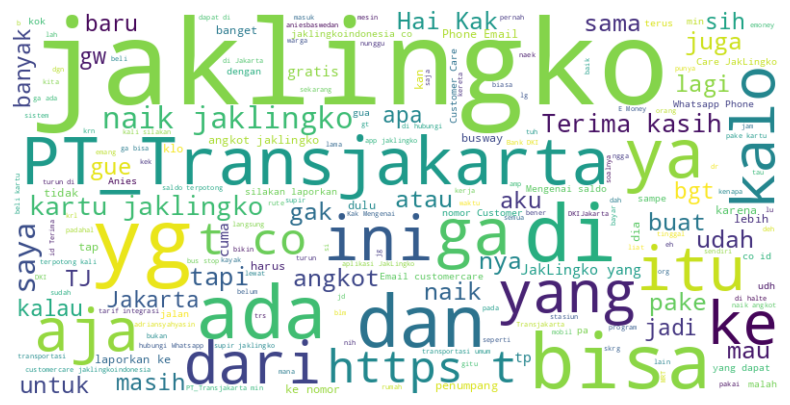

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan teks dari semua baris dalam kolom 'full_text'
text_combined = ' '.join(df_clean['full_text'].astype(str))

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
filter_char = lambda c: ord(c) < 256
df_clean['full_text'] = df_clean['full_text'].apply(lambda s: ''.join(filter(filter_char, s)))
df_clean

<ipython-input-92-122f70345d6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['full_text'] = df_clean['full_text'].apply(lambda s: ''.join(filter(filter_char, s)))


,full_text
0,@adriansyahyasin padahal nih yah.. ga usah pa...
1,Bisa naik jaklingko dari cipayung ke tamini 0 ...
2,gw banget lagi terus naik jaklingko gratis ke ...
3,"Ya mesti dibuat Stasiun baru, karna Stasiun te..."
4,Nilai tauladan yg bisa diambil dari nunggu jak...
...,...
1247,@PT_Transjakarta angkot jaklingko skrg kok gal...
1248,@albertocung Ombgunan Tugu yg sama skali tiada...
1249,"Min, @PT_Transjakarta jarak antar angkot Jakli..."
1250,@adnardn Nunggu jaklingko bisa 1 2 jam pas pul...


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  1252 non-null   object
dtypes: object(1)
memory usage: 9.9+ KB


In [ ]:
df_clean['full_text'] = df_clean['full_text'].astype(pd.StringDtype())
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  1252 non-null   string
dtypes: string(1)
memory usage: 9.9 KB


<ipython-input-94-263529cc0f51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['full_text'] = df_clean['full_text'].astype(pd.StringDtype())


In [ ]:
for i in range(len(df_clean)):
  tweet = df_clean["full_text"][i]
  df_clean["full_text"][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())

<ipython-input-95-5c652e393d89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["full_text"][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())


In [ ]:
df_clean

,full_text
0,padahal nih yah ga usah pada banyak cingcong i...
1,Bisa naik jaklingko dari cipayung ke tamini 0 ...
2,gw banget lagi terus naik jaklingko gratis ke ...
3,Ya mesti dibuat Stasiun baru karna Stasiun ter...
4,Nilai tauladan yg bisa diambil dari nunggu jak...
...,...
1247,Transjakarta angkot jaklingko skrg kok galak2 ...
1248,Ombgunan Tugu yg sama skali tiada kmanfaatanya...
1249,Min Transjakarta jarak antar angkot Jaklingko ...
1250,Nunggu jaklingko bisa 1 2 jam pas pulang kerja...


In [ ]:
duplicate = df_clean[df_clean.duplicated("full_text")]

print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,full_text
50,Transjakarta Halo JakLingko mau pengaduan dong...
51,Transjakarta Halo JakLingko mau pengaduan dong...
52,Transjakarta Halo JakLingko mau pengaduan dong...
181,Hai Kak Mengenai saldo terpotong 2 kali silaka...
186,Hai Kak Mengenai saldo terpotong 2 kali silaka...
191,Hai Kak Mengenai saldo terpotong 2 kali silaka...
268,Hai Kak Mengenai saldo terpotong 2 kali silaka...
353,Hai Kak Mohon maaf atas kendala yang dialami m...
354,Hai Kak Mohon maaf atas kendala yang dialami m...
409,Hai kak Mohon maaf atas kendala yang dialami m...


In [ ]:
df_clean.drop_duplicates(subset="full_text", keep=False, inplace=True)
df_clean = df_clean.reset_index(drop=True)

df_clean

<ipython-input-98-0b1351c412cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop_duplicates(subset="full_text", keep=False, inplace=True)


,full_text
0,padahal nih yah ga usah pada banyak cingcong i...
1,Bisa naik jaklingko dari cipayung ke tamini 0 ...
2,gw banget lagi terus naik jaklingko gratis ke ...
3,Ya mesti dibuat Stasiun baru karna Stasiun ter...
4,Nilai tauladan yg bisa diambil dari nunggu jak...
...,...
1195,Transjakarta angkot jaklingko skrg kok galak2 ...
1196,Ombgunan Tugu yg sama skali tiada kmanfaatanya...
1197,Min Transjakarta jarak antar angkot Jaklingko ...
1198,Nunggu jaklingko bisa 1 2 jam pas pulang kerja...


In [ ]:
df_clean.head()

,full_text
0,padahal nih yah ga usah pada banyak cingcong i...
1,Bisa naik jaklingko dari cipayung ke tamini 0 ...
2,gw banget lagi terus naik jaklingko gratis ke ...
3,Ya mesti dibuat Stasiun baru karna Stasiun ter...
4,Nilai tauladan yg bisa diambil dari nunggu jak...


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('drive')

Mounted at drive


In [ ]:
df_clean.to_csv('data_clean.csv')
!cp data_clean.csv "drive/My Drive/"